In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os 


In [30]:
dataset = Path("./benchmark_results/5900x_rtx3700_6plates.csv")
df = pd.read_csv(dataset)
df = df.drop(labels="Run", axis=1)
# Convert seconds to minutes and round to integers
df = df.div(60).round(0).astype(int)
df

,auto_plate_plotter.py,parallel_plate_plotter.py
0,67,16
1,66,16
2,68,15
3,67,15
4,69,15


c:\Users\alber.DESKTOP-VIFBJNG\mambaforge\envs\dbn39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alber.DESKTOP-VIFBJNG\mambaforge\envs\dbn39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alber.DESKTOP-VIFBJNG\mambaforge\envs\dbn39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alber.DESKTOP-VIFBJNG\mambaforge\envs\dbn39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

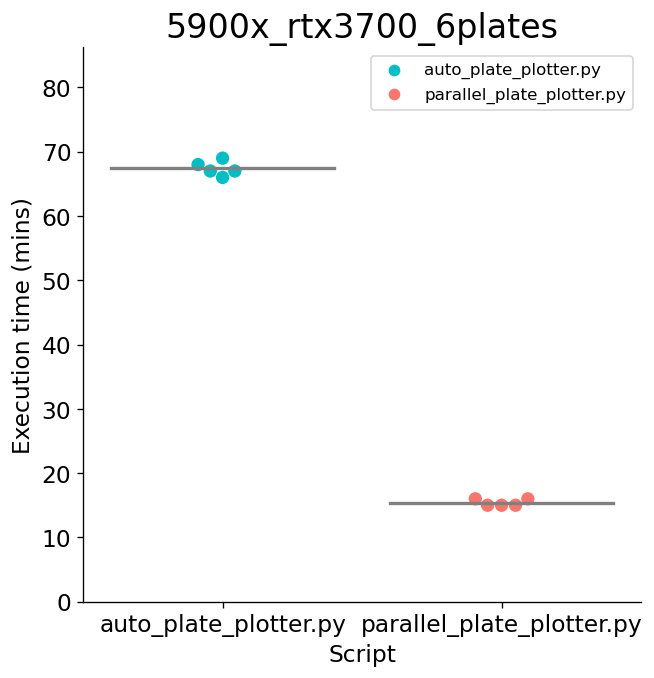

In [31]:
plot_name = os.path.basename(dataset)
plot_name = plot_name.replace(".csv", "")
plot_name

# Plot dataset with Seaborn
plt.figure(figsize=(6,6), dpi=120)

#If you want to hide the legend remove the hue parameter and comment out the #plt.legend() method below
sns.swarmplot(data=df.melt(), x="variable", y="value", palette=['#00BFC4','#F8766D'], size = 8, hue = "variable")
plt.legend().set_title(None)
plt.title(label=plot_name, fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'grey', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="variable",
            y="value",
            data=df.melt(),
            showfliers=False,
            showbox=False,
            showcaps=False)

# Reset the axis title after using boxplot to plot the mean line
plt.ylabel('Execution time (mins)', fontsize=14)
plt.xlabel('Script', fontsize=14)

# Change the y axis limits in order to leave space to plot the p-value on top
ax1 = plt.gca()
y_top_limit = (df.to_numpy().max()) + (df.to_numpy().max())*0.25
ax1.set_ylim([0, y_top_limit])

# Hide top and right spines from the frame
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Save the result as a vector image to benchamrk_results folder
plt.savefig(f"./benchmark_results/{plot_name}.svg", format = 'svg', dpi=300, bbox_inches='tight')

# Display the result
plt.show()